---
# Title: "Air Quality Summer School Data Analysis With R"

### output:
  html_notebook: default <br />
  pdf_document: default

---

This is an [R Markdown](http://rmarkdown.rstudio.com) Notebook. When you execute code within the notebook, the results appear beneath the code.

The codes below helps in analysing air quality data

Below are the required libraries for this section. The Key library is the openair maintain by [David Carslaw](david.carslaw@york.ac.uk)
Visit these [sites](https://davidcarslaw.github.io/openair/) for [more info](https://github.com/davidcarslaw/openair).

You can [Report Bug issues](https://github.com/davidcarslaw/openair/issues) as well.

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages("openair")
install.packages("zoo")
install.packages("rio")
install.packages("tidyverse")

(as ‘lib’ is unspecified)







	‘/tmp/Rtmp8U3lOs/downloaded_packages’

(as ‘lib’ is unspecified)





























	‘/tmp/Rtmp8U3lOs/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmp8U3lOs/downloaded_packages’



In [ ]:
%%R
library(readr)
library(ggplot2)
library(lubridate)
library(data.table)
library(openair)
library(dplyr)
library(zoo)
library(rio)
library(tidyverse)

Attaching package: ‘lubridate’



    date, intersect, setdiff, union



Attaching package: ‘data.table’



    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


Attaching package: ‘dplyr’



    between, first, last



    filter, lag



    intersect, setdiff, setequal, union


Attaching package: ‘zoo’



    as.Date, as.Date.numeric


Use 'install_formats()' to install them



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats 1.0.0     ✔ tibble  3.2.1
✔ purrr   1.0.2     ✔ tidyr   1.3.0
✔ stringr 1.5.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()      masks data.table::between()
✖ dplyr::filter()       masks stats::filter()
✖ dplyr::first()        masks data.table::first()
✖ data.table::hour()    masks lubridate::hour()
✖ data.table::isoweek() masks lubridate::isoweek()
✖ dplyr::lag()          masks stats::lag()
✖ dplyr::last()         masks data.table::last()
✖ data.table::mday()    masks lubridate::mday()
✖ data.table::minute()  masks lubridate::minute()
✖ data.table::month()   masks lubridate::month()
✖ data.table::quarter() masks lubridate::quarter()
✖ data.table::second()  masks lubridate::second()
✖ purrr::transpose()    masks data.table::transpose()
✖ data.table::wday()    masks lubridate::wday()
✖ data.table::week()    masks lubridate::week()
✖ data.t

In [ ]:
%%R
filepath= 'https://raw.githubusercontent.com/aqppssgh/2023-School/main/AQ_SS_PRACTICALS/DATA/CLEANED_DATA/cleaned_met_aq_data2.csv'
df <- import(filepath,header=TRUE,sep = ',', date = 'Time',
                  date.format = '%Y-%m-%d %H:%M',na.strings = c("-99.0", "-999","-9999",""))
df$date_time <- lubridate::mdy_hm(df$date_time)

Have a *glimpse* of the data

In [43]:
%%R
glimpse(df)

Rows: 8,127
Columns: 13
$ date_time          <dttm> 2020-01-01 00:00:00, 2020-01-01 01:00:00, 2020-01-…
$ `PM2.5_ug/m3`      <dbl> 75.6655, 88.7644, 195.9496, 274.7239, 219.7108, 179…
$ `PM10_ug/m3`       <dbl> 154.150, 186.100, 439.740, 637.005, 499.025, 398.21…
$ obs_temp           <int> 28, 27, 27, 26, 26, 25, 26, 26, 27, 29, 31, 32, 32,…
$ obs_RH             <dbl> 78.90, 83.66, 83.66, 88.75, 88.75, 88.67, 88.75, 88…
$ obs_wind_speed     <dbl> 0.5140814, 0.5140814, 2.0563254, 2.5704068, 2.57040…
$ obs_wind_direction <chr> "NW", "NW", "NW", "W", "W", "W", "NW", "NW", "N", "…
$ wind_direc         <int> 300, 300, 300, 280, 270, 280, 300, 300, 10, 10, 40,…
$ sensor_temp        <dbl> 30, 29, 29, 28, 28, 27, 28, 32, 35, 37, 38, 39, 39,…
$ sensor_RH          <dbl> 64.73, 65.97, 67.37, 70.37, 70.50, 70.60, 68.81, 60…
$ windspeed          <dbl> 0.8062, 0.8447, 0.7959, 1.0713, 1.2593, 1.4755, 1.6…
$ direction          <chr> "W", "W", "NW", "W", "NW", "NW", "NW", "NW", "NW", …
$ wd            

Rename some of the columns to be able to work with easily using the *openair library*


In [ ]:
%%R
df2<- rename(df,date = date_time,pm25 = 'PM2.5_ug/m3',pm10='PM10_ug/m3',
             temp=obs_temp,rh=obs_RH,temp2=sensor_temp,rh2=sensor_RH,
             ws=obs_wind_speed,wd2=wd,wd=wind_direc,ws2=windspeed)

The data is in a good form to work around it with the *openair* and functions within it.
The *summaryPlot* function give you a statistical overview of all the variables in the data with timeseries plot attached. The function contains different parameter requirements that can be varied for better view of the data. *eg the avg.time, percentile*


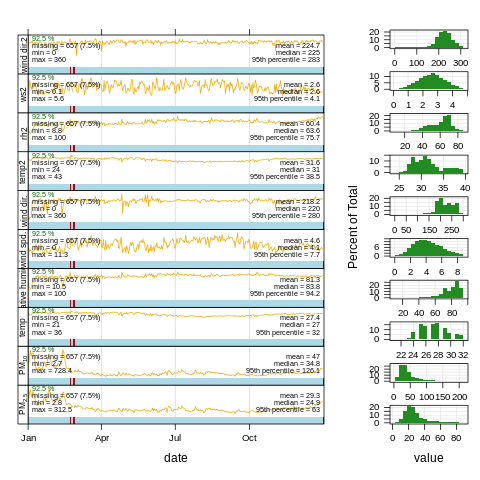

In [ ]:
%%R
summaryPlot(df2,avg.time = 'day')

For a correlation matrices, the *corPlot* function is used. This gives the correlation among all the variables in the dataset.

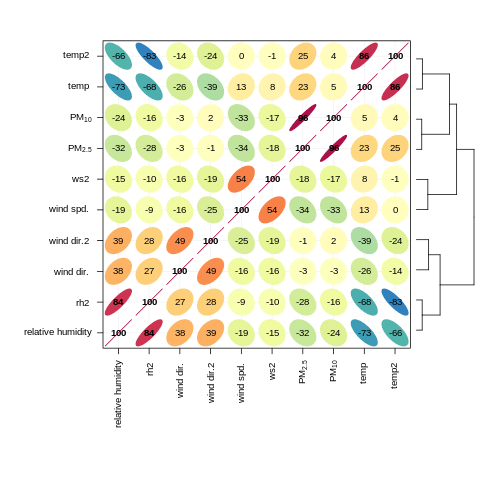

In [ ]:
%%R
corPlot(df2, dendrogram = TRUE)

The following line of codes will evaluate the sensor*(mod)* temperature *(check the column names)*,
the sensor RH *(check the columns name)* against an observed *(obs)* temperature *temp* and RH *rh* data.
The wind components can also be assessed all using the *modStats*.
This can be done at your own time. Try and vary the parameters and make meaning from results

(The function can also be used to evaluate model and reference data)

1St evaluation of temperatures

In [ ]:
%%R
#evaluation of met reference data and sensor data
modStats(df2, obs = "temp", mod = "temp2")

# A tibble: 1 × 12
  default      n  FAC2    MB   MGE   NMB  NMGE  RMSE     r     P   COE     IOA
  <fct>    <int> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>   <dbl>
1 all data  8127     1  4.23  4.23 0.154 0.154  4.65 0.856     0 -1.20 -0.0912


In [26]:
%%R
#2nd evaluation of RH
modStats(df2, obs = "rh", mod = "rh2")

# A tibble: 1 × 12
  default      n  FAC2    MB   MGE    NMB  NMGE  RMSE     r     P   COE     IOA
  <fct>    <int> <dbl> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>   <dbl>
1 all data  8127 0.996 -20.9  21.0 -0.257 0.258  22.0 0.845     0 -1.22 -0.0989


The *timeVariation* function produces four plots: day of the week variation, mean hour of day variation and a combined hour of day – day of week plot and a monthly plot. Examples are shown for two variables at a time, you can add a third *c("v1","v2","v3")*
This function can be used to compare different pollutants, pollutant from different sites and meteorological parameters.
Vary the parameters and interpret what you see.


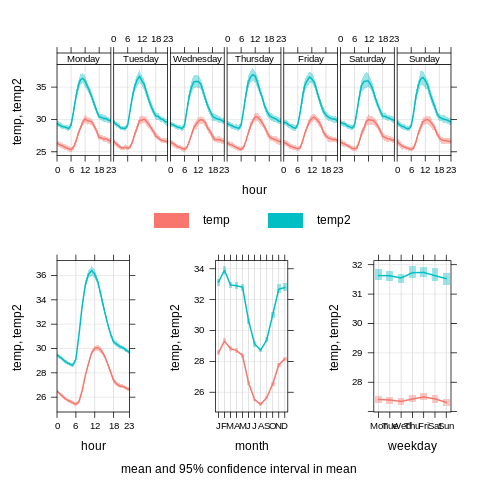

In [27]:
%%R
timeVariation(df2, pollutant = c("temp", "temp2"), normalise = FALSE)

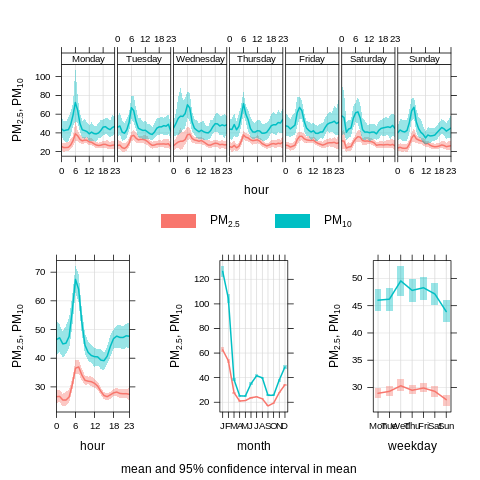

In [28]:
%%R
timeVariation(df2, pollutant = c("pm25", "pm10"), normalise = FALSE)

A common task in the analysis of air pollution is the comparison of different pollutant levels at the same time and the *timePlot* function is a useful tool for that. The function plots timeseries of pollutants or other variables. Discuss your observation for day and month timesteps.


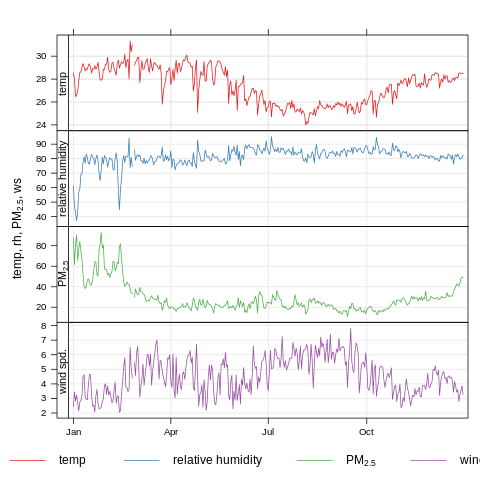

In [29]:
%%R
timePlot(df2, pollutant =  c("temp", "rh","pm25","ws"),y.relation = "free", avg.time = "day")

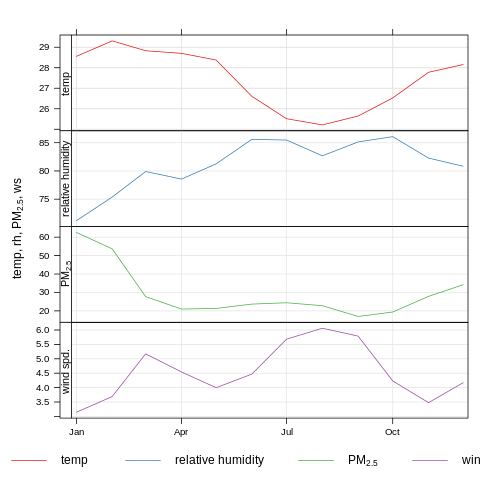

In [30]:
%%R
timePlot(df2, pollutant =  c("temp", "rh","pm25","ws"),y.relation = "free", avg.time = "month")

The *calendarPlot* function is one of the easy ways to visualize data on a time scale of day and months. This helps you understand variations in air pollution per day for each month in a year.
Discuss your variations

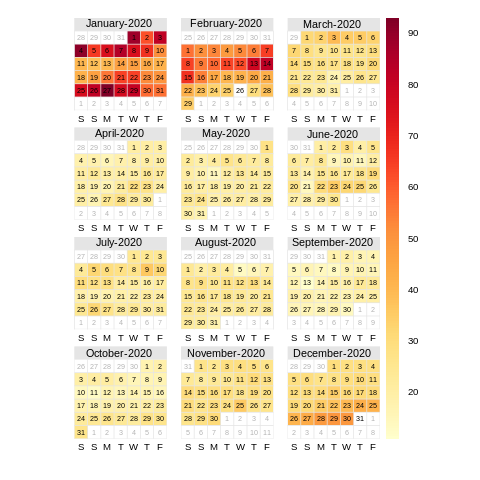

In [31]:
%%R
calendarPlot(df2, pollutant = "pm25", year =2020)

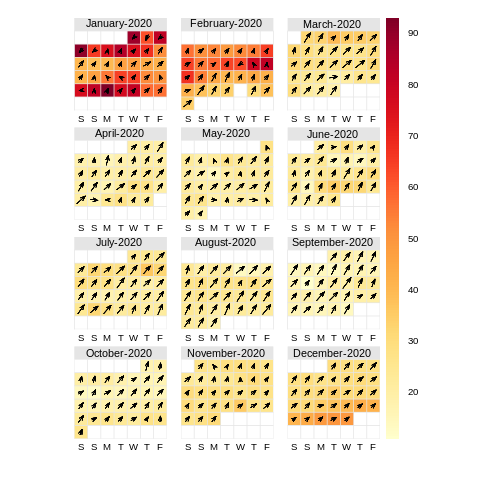

In [33]:
%%R
calendarPlot(df2, pollutant = "pm25", year = 2020, annotate = "ws")

The WHO threshold for PM2.5 is 15ug/m3, the rest of the break levels were

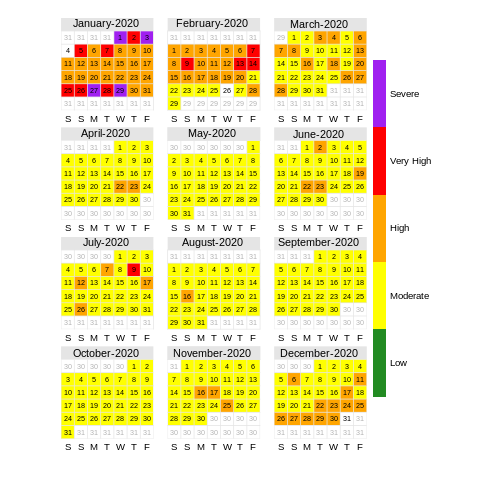

In [34]:
%%R
calendarPlot(df2, pollutant = "pm25", year = 2020,
             breaks = c(0, 14, 50, 100, 150, 300),
             labels = c("Low", "Moderate", "High", "Very High","Severe"),
             cols = c("forestgreen", "yellow","orange", "red", "purple"),
             statistic = "max")

Understanding variations with the wind speed and direction.
The wind speed and direction are very important components in the analysis of air pollution. These meteorological parameters helps in understanding the transport and trajectory of the air pollutants. A couple of functions *(windRose,pollutionRose, polarPlot and polarFreq)* will be used in this section.
Vary the variables position and interpret your results.



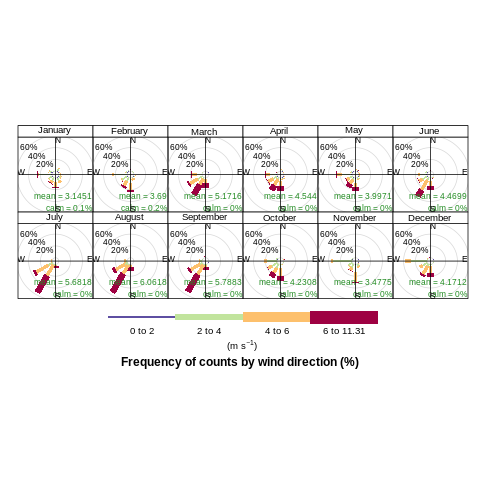

In [35]:
%%R
#*1st is wind speed and direction according to the months*
windRose(df2,ws='ws',wd='wd', type = "month", layout = c(6, 2))


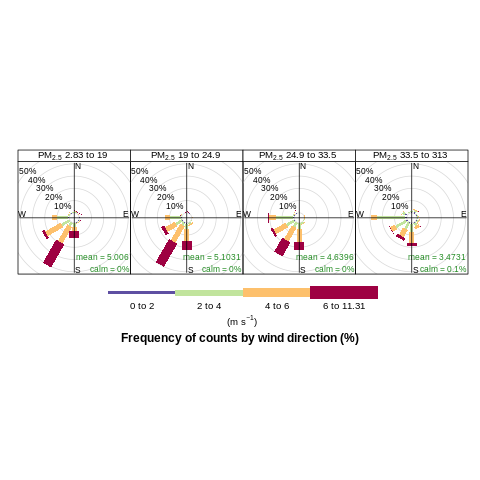

In [36]:
%%R
#2nd with pollutant* Wind rose for four different levels of PM2.5 concentration The levels are defined as the four quantiles of PM2.5 concentration and the ranges are shown on each of the plot labels
windRose(df2, type = "pm25", layout = c(4, 1))


*pollutionRose* function is a variant of *windRose(used above)* that is useful for considering pollutant concentrations by wind direction, or more specifically the percentage time the concentration is in a particular range.


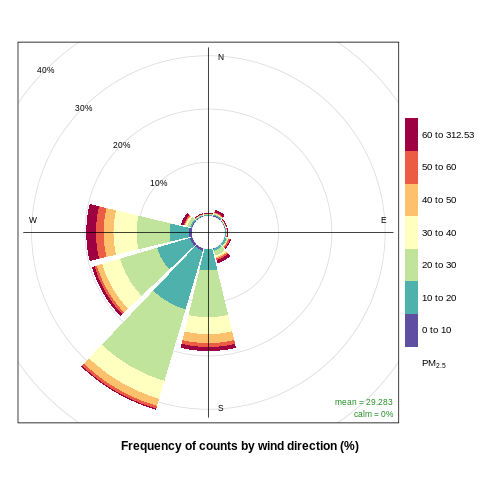

In [37]:
%%R
pollutionRose(df2, pollutant = "pm25")

Now lets plot using month for type an examine the output

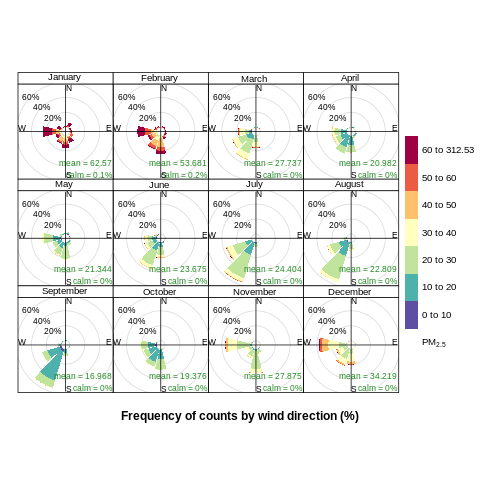

In [38]:
%%R
pollutionRose(df2, pollutant = "pm25",type='month')

Also, each wind sector can be normalized to give a probability between 0 and 1 to help show the variation within each wind sector more clearly.

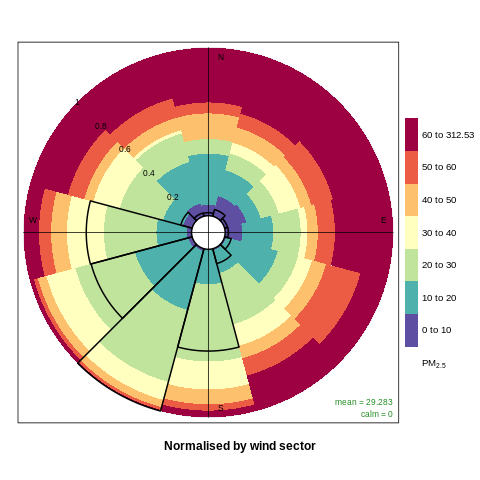

In [39]:
%%R
pollutionRose(df2, pollutant = "pm25", normalise = TRUE, seg = 1)

Concentrations are shown to vary by wind speed and wind direction. This helps in understanding the prevailing conditions (with respect to wind and direction). You can also change the pollutant and put in a meteorological parameter and see the relationship.


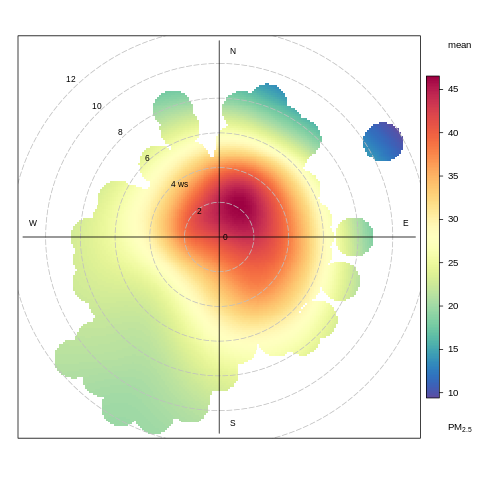

In [40]:
%%R
polarPlot(df2,pollutant = "pm25",x = "ws",wd = "wd")

This is a custom-made plot to compactly show the distribution of wind speeds and directions from meteorological measurements. It is similar to the traditional wind rose, but includes a number of enhancements to also show how concentrations of pollutants and other variables vary. Each cell gives the total number of hours the wind was from that wind speed/direction in a particular year. The number of hours is coded as a color scale shown to the right.


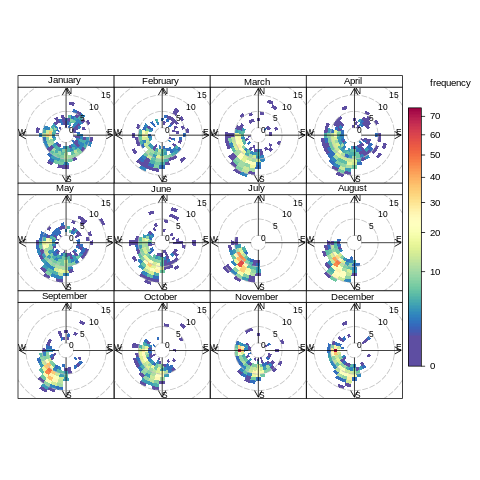

In [41]:
%%R
polarFreq(df2, type = "month")

For this plot, we are mostly interested in just the contribution by wind direction and not wind speed

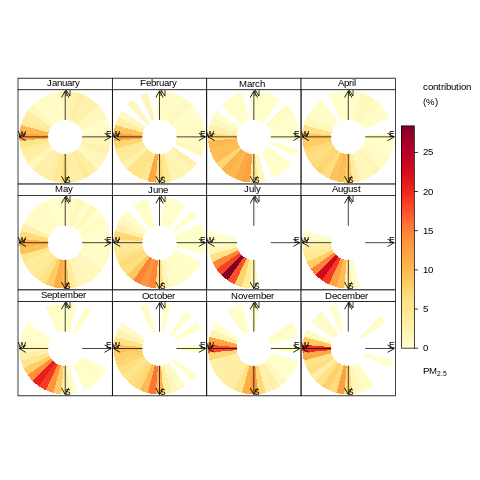

In [42]:
%%R
polarFreq(df2, pollutant = "pm25", type='month',ws.int = 30, statistic = "weighted.mean",
          offset = 80, trans = FALSE, col = "heat")


**This may be the end of the practical section and the codes for this session but not for your own free time and other data practices. use the links provided to access more information on the openair package and how it can help you.**